In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)


In [6]:
train=training_datagenarator.flow_from_directory('/content/drive/MyDrive/AI/data',
                                                target_size=(224, 224),
                                       class_mode='categorical', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('/content/drive/MyDrive/AI/data',
                                                target_size=(224, 224),
                                       class_mode='categorical', batch_size=batch_size,subset='validation')

Found 817 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


In [7]:
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [9]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size

                 )


51/51 [==============================] - 178s 3s/step - loss: 0.5386 - accuracy: 0.7230 - val_loss: 0.6403 - val_accuracy: 0.6125


In [11]:
%cd /content/drive/MyDrive/AI

/content/drive/MyDrive/AI


In [12]:
cnn.save("model3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 188ms/step
[[0.3751934  0.62480664]]


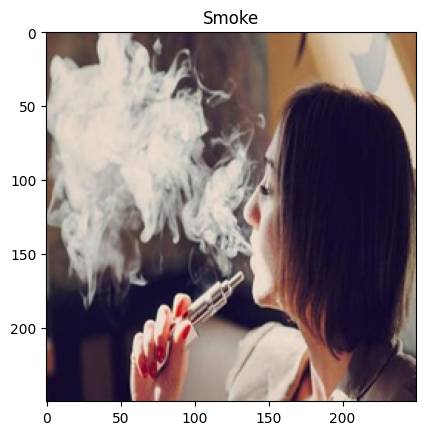

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt

# Load the pre-trained model
model = keras.models.load_model('model3.h5')

# Load and preprocess the image
image_path = 'data/smoker/smoking_0002.jpg'  # Replace with your image path
test_image = keras.utils.load_img(image_path, target_size=(224, 224))  # Resizing
test_image = keras.utils.img_to_array(test_image)  # Convert to array
test_image /= 255  # Normalize
test_image = np.expand_dims(test_image, axis=0)  # Expand dimensions for model input

# Make the prediction
result = model.predict(test_image)
print(result)
# The index of the class with the highest probability
predicted_class = np.argmax(result[0])  # 0 for "not smoke", 1 for "Smoke"

# Define the categories
categories = ['not smoke', 'Smoke']

# Show the image with the predicted label
image_show = PIL.Image.open(image_path)
plt.imshow(image_show)
plt.title(categories[predicted_class])  # Title is either "not smoke" or "Smoke"
plt.show()
